In [1]:
import tensorflow as tf;

2023-04-11 17:21:41.121261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 17:21:41.181191: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-11 17:21:41.527712: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.2/lib64:/usr/local/cuda-11.2/extras/CUPTI/lib64
2023-04-11 17:21:41.527759: W 

train:


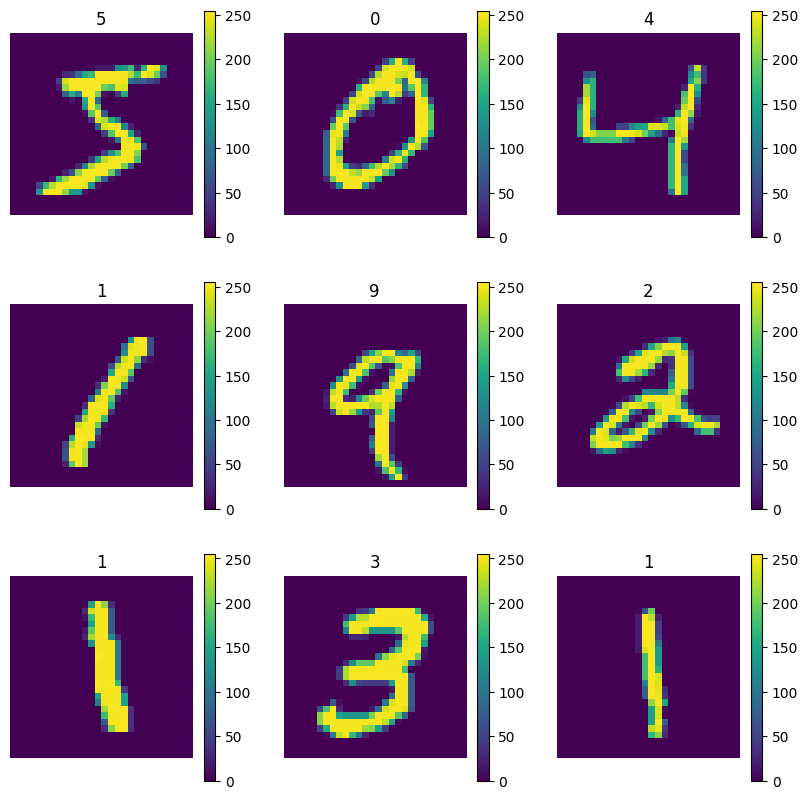

test:


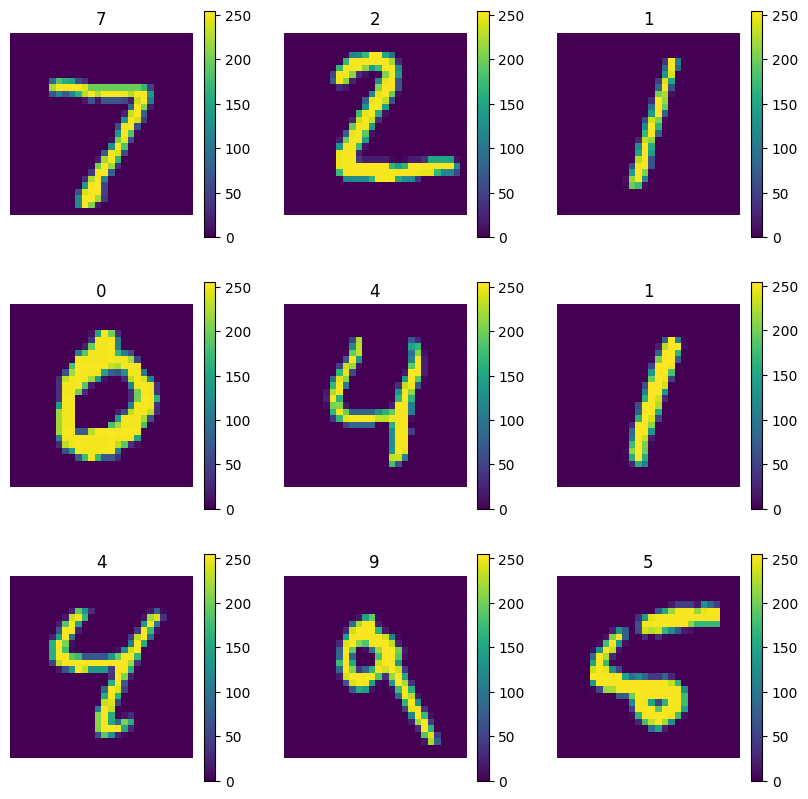

In [2]:
mnist = tf.keras.datasets.mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# newX_train = np.ndarray(shape=(len(x_train), 28, 28, 3),dtype=np.float64);
# newX_test = np.ndarray(shape=(len(x_test), 28, 28, 3),dtype=np.float64);

# import cv2
# # image = (np.ones([28,28,3]) * 255).astype(np.uint8)
# image = (np.zeros([28,28,3]) * 255).astype(np.uint8)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# for i in range(0, len(x_train)):
#     #newX_train[i] = cv2.merge([x_train[i],x_train[i],x_train[i]]);
#     newX_train[i] = cv2.merge([gray, gray, x_train[i]]);
    
# for i in range(0, len(x_test)):
#     # newX_test[i] = cv2.merge([x_test[i],x_test[i],x_test[i]]);
#     newX_test[i] = cv2.merge([gray, gray, x_test[i]]);

# x_train = newX_train;
# x_test = newX_test

#print(x_train.shape)


print('train:')
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(0,9):
    ax = plt.subplot(3,3,i+1);
    plt.title(y_train[i])
    
    plt.imshow(x_train[i]);

    # Convert to grayscale (1 channel)
    # gray_three = cv2.merge([x_train[i],x_train[i],x_train[i]])
    # plt.imshow(gray_three);

    plt.colorbar()
    plt.axis("off");
plt.show()
print('test:')
plt.figure(figsize=(10,10))
for i in range(0,9):
    ax = plt.subplot(3,3,i+1);
    plt.title(y_test[i])
    plt.imshow(x_test[i]);
    plt.colorbar()
    plt.axis("off");
plt.show()


x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
#new
# inputs = tf.keras.Input(shape=(28,28))
# x1 = tf.keras.layers.Flatten()(inputs);
# x2 = tf.keras.layers.Dense(128, activation='relu')(x1);
# x3 = tf.keras.layers.Dropout(0.2)(x2);

# inputs = tf.keras.layers.Add()([x1,x2,x3]);

# outputs = tf.keras.layers.Dense(10)(inputs);
# model = tf.keras.Model(inputs, outputs)
# tf.keras.utils.plot_model(model, show_shapes=True, to_file="mnew.png");

#old
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),
  #tf.keras.layers.Softmax()
])

tf.keras.utils.plot_model(model, show_shapes=True, to_file="mold.png");

2023-04-11 17:21:43.337301: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-04-11 17:21:43.337392: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 525.89.2 does not match DSO version 525.105.17 -- cannot find working devices in this configuration


In [4]:
# print('train:')
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))
# for i in range(0,9):
#     ax = plt.subplot(3,3,i+1);
#     plt.title(y_train[i])
#     plt.imshow(x_train[i]);
#     plt.colorbar()
#     plt.axis("off");
# plt.show()
# print('test:')


# testModel = tf.keras.models.Sequential(
#     layers = [
#         #tf.keras.layers.Flatten(input_shape=(28,28)),
#         tf.keras.layers.RandomFlip("horizontal"),
#         #tf.keras.layers.RandomRotation(0.5),
#     ]
# );

# print(x_train.shape)
# newData = testModel(x_train);
# print(newData.shape)

# plt.figure(figsize=(10,10))
# for i in range(0,9):
#     ax = plt.subplot(3,3,i+1);
#     plt.title(y_train[i])
#     plt.imshow(newData[i].numpy().reshape(28,28));
#     plt.colorbar()
#     plt.axis("off");
# plt.show()

In [5]:
predictions = model(x_train[:1]).numpy();
print(predictions)

[[ 0.3931769   0.54313606 -0.45679212 -0.88811225  0.10624453 -0.3758115
  -0.13059193 -0.06566928 -0.26940787  0.10632362]]


In [6]:
aa = tf.nn.softmax(predictions).numpy();
print(predictions)
print(aa)

[[ 0.3931769   0.54313606 -0.45679212 -0.88811225  0.10624453 -0.3758115
  -0.13059193 -0.06566928 -0.26940787  0.10632362]]
[[0.15217519 0.17679513 0.06504396 0.04225587 0.11421699 0.07053041
  0.09013095 0.09617661 0.07844891 0.11422602]]


In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(loss_fn)

In [8]:
res1 = loss_fn(y_train[:1], predictions).numpy()
print(res1)

2.6517115


In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
tf.keras.utils.plot_model(model, show_shapes=True, to_file="m2.png");

In [10]:
resultFilePath = 'number_check.h5';
import os;
if os.path.exists(resultFilePath) == False:
    print("当前数据存在:%s" % resultFilePath);
    model = tf.keras.models.load_model(resultFilePath);
else:
    print("当前数据不存在，训练");
    model.fit(
        x = x_train, 
        y = y_train, 
        callbacks=tf.keras.callbacks.ModelCheckpoint('number_check.h5', save_best_only=True),
        validation_data=(x_test, y_test),
        epochs=2,
    )

当前数据不存在，训练
Epoch 1/2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2961 - accuracy: 0.9144 - val_loss: 0.1426 - val_accuracy: 0.9578
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1452 - accuracy: 0.9561 - val_loss: 0.1026 - val_accuracy: 0.9690


In [11]:
model.summary();
model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1026 - accuracy: 0.9690 - 149ms/epoch - 477us/step


[0.10261019319295883, 0.968999981880188]

In [12]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [13]:
res = probability_model(x_test[:3])
print(res.numpy())
print(np.argmax(res.numpy()[0]))
print(np.argmax(res.numpy()[1]))
print(np.argmax(res.numpy()[2]))
print(y_test[:3])

[[5.6826258e-07 2.4137883e-08 2.4597011e-05 2.1919209e-04 7.0873296e-10
  8.5447340e-07 2.8607710e-11 9.9973184e-01 2.5471709e-07 2.2785274e-05]
 [1.7971254e-06 4.4280913e-04 9.9878699e-01 4.0956234e-04 6.3513899e-12
  2.0617277e-04 3.1782896e-05 3.8973180e-10 1.2097753e-04 5.8930548e-11]
 [1.1817633e-06 9.9687237e-01 1.2375350e-04 4.2037926e-05 1.4426242e-04
  5.3410964e-05 1.3795488e-04 2.5442410e-03 6.9162044e-05 1.1725671e-05]]
7
2
1
[7 2 1]


(28, 28)
1/1 [==============================] - 0s 30ms/step
[[-0.06129032 -3.1354554  -0.58729964 -0.47420654 -0.50365686 -0.08948261
   0.30990106 -0.9064045   0.801198   -0.74154794]]
8
[[0.11536523 0.00533313 0.06817608 0.07633922 0.07412378 0.11215824
  0.16721733 0.04955032 0.2733058  0.05843093]]
8


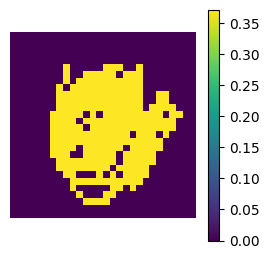

In [14]:
import cv2
img2=cv2.imread("aa.png",cv2.IMREAD_GRAYSCALE)
print(img2.shape)
cv2.imwrite("aa.png", img2);

# img = tf.keras.preprocessing.image.load_img(
#     "aa.png", target_size=(28,28)
# )

img_array = tf.keras.utils.img_to_array(img2)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis
img_array = img_array / 255.0;

plt.figure(figsize=(3,3))
plt.imshow(img_array[0]);
plt.colorbar()
plt.axis("off");

predictions = model.predict(img_array)
print(predictions)
print(np.argmax(predictions[:1]))

res = probability_model(img_array)
print(res.numpy())
print(np.argmax(res.numpy()))
